### ALL Detection 
Detect an input image and classify it to one of the following categories:
  - Begnin
  - Early
  - Pre
  - Pro

In [1]:
import os

import cv2
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
def segmentation(org_img):
    #threshold range
    light_orange = (168, 50, 50)
    dark_orange = (182, 255, 255)

    image = cv2.imread(org_img)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    mask = cv2.inRange(image, light_orange, dark_orange)
    
    result = cv2.bitwise_and(image, image, mask=mask)
    
    image_name = org_img.split(sep='/')[-1]
    seg_img = f'./seg-{image_name}'
    cv2.imwrite(seg_img, result)
    return seg_img

In [3]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(org_filename, img_shape=224):
    # apply segmentation on image 
    seg_filename = segmentation(org_filename)
    
    # Read in target file (an image)
    org_img = tf.io.read_file(org_filename)
    seg_img = tf.io.read_file(seg_filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
    org_img = tf.image.decode_image(org_img, channels=3)
    seg_img = tf.image.decode_image(seg_img, channels=3)
    
    # Resize the image (to the same size our model was trained on)
    org_img = tf.image.resize(org_img, size = [img_shape, img_shape])
    seg_img = tf.image.resize(seg_img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    org_img = org_img/255.
    seg_img = seg_img/255.
    return [org_img, seg_img]

In [4]:
def predict_and_plot(model, filename, class_names):   
    # Import the target image and preprocess it
    [org_img, seg_img] = load_and_prep_image(filename)

    # Make a prediction
    prediction = model.predict(tf.expand_dims(seg_img, axis=0))
    
    # Get the predicted class
    pred_class = class_names[np.argmax(prediction)]
    
    # Plot the image and predicted class
    plt.imshow(org_img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

In [5]:
# load model
model = load_model("saved_trained_model_h5.h5")

In [6]:
filename_1 = 'original_img.jpg'
filename_2 = 'pro_img.jpg'
classes = ['Benign', 'Early', 'Pre', 'Pro']

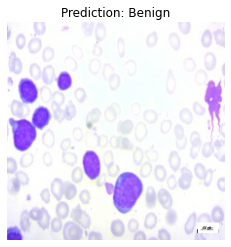

In [7]:
predict_and_plot(model, filename_1, classes)

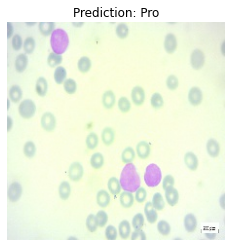

In [8]:
predict_and_plot(model, filename_2, classes)